In [1]:
import random
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')
data_info = pd.read_csv('Dataset/data_info.csv')

In [27]:
data_info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [48]:
column_names = train.columns.values.tolist()

for i in column_names:
    print(f"{i} = {train[i].nunique()}")
# 총 61개의 도로, 586개의 시작/도착 (위경도), 487개의 시작/도착 도로명 

id = 4701217
base_date = 281
day_of_week = 7
base_hour = 24
lane_count = 3
road_rating = 3
road_name = 61
multi_linked = 2
connect_code = 2
maximum_speed_limit = 6
vehicle_restricted = 1
weight_restricted = 4
height_restricted = 1
road_type = 2
start_node_name = 487
start_latitude = 586
start_longitude = 586
start_turn_restricted = 2
end_node_name = 487
end_latitude = 586
end_longitude = 586
end_turn_restricted = 2
target = 102


In [26]:
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [31]:
test.head().T

,0,1,2,3,4
id,TEST_000000,TEST_000001,TEST_000002,TEST_000003,TEST_000004
base_date,20220825,20220809,20220805,20220818,20220810
day_of_week,목,화,금,목,수
base_hour,17,12,2,23,17
lane_count,3,2,1,3,3
road_rating,107,103,103,103,106
road_name,연삼로,일반국도12호선,일반국도16호선,일반국도11호선,번영로
multi_linked,0,0,0,0,0
connect_code,0,0,0,0,0
maximum_speed_limit,70.0,70.0,60.0,70.0,70.0


In [47]:
train.describe()

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
count,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4701217.0,4.701217e+06,4701217.0,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06
mean,2.021672e+07,1.192820e+01,1.836651e+00,1.049585e+02,4.762597e-04,2.660218e-01,6.125329e+01,0.0,5.618742e+03,0.0,6.152237e-01,3.338432e+01,1.265217e+02,3.338432e+01,1.265217e+02,4.278844e+01
std,4.555709e+03,6.722092e+00,6.877513e-01,1.840107e+00,2.181818e-02,5.227760e+00,1.213354e+01,0.0,1.395343e+04,0.0,1.211268e+00,1.012015e-01,1.563657e-01,1.011948e-01,1.563519e-01,1.595443e+01
min,2.021090e+07,0.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,3.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.324343e+01,1.261826e+02,3.324343e+01,1.261826e+02,1.000000e+00
25%,2.021110e+07,6.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,5.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.326422e+01,1.264232e+02,3.326422e+01,1.264232e+02,3.000000e+01
50%,2.022013e+07,1.200000e+01,2.000000e+00,1.060000e+02,0.000000e+00,0.000000e+00,6.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.341257e+01,1.265112e+02,3.341257e+01,1.265112e+02,4.300000e+01
75%,2.022050e+07,1.800000e+01,2.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,7.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.347804e+01,1.265840e+02,3.347804e+01,1.265840e+02,5.400000e+01
max,2.022073e+07,2.300000e+01,3.000000e+00,1.070000e+02,1.000000e+00,1.030000e+02,8.000000e+01,0.0,5.000000e+04,0.0,3.000000e+00,3.355608e+01,1.269309e+02,3.355608e+01,1.269309e+02,1.130000e+02


In [32]:
train.corr()

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
base_date,1.000000,-0.008645,0.011463,0.018547,0.000832,-0.010633,-0.018713,NaN,-0.011030,NaN,-0.004599,-0.016818,-0.004954,-0.016786,-0.004972,-0.033997
base_hour,-0.008645,1.000000,-0.029194,0.031658,0.005711,-0.002649,-0.036756,NaN,-0.003231,NaN,-0.007880,-0.021599,-0.011478,-0.021597,-0.011489,-0.159407
lane_count,0.011463,-0.029194,1.000000,-0.095717,-0.026555,-0.029290,0.384002,NaN,-0.177224,NaN,-0.050715,0.182674,-0.094806,0.182330,-0.094732,-0.144256
road_rating,0.018547,0.031658,-0.095717,1.000000,0.024218,-0.054160,-0.327474,NaN,-0.118630,NaN,-0.125618,-0.204793,0.007401,-0.204843,0.007386,-0.261693
multi_linked,0.000832,0.005711,-0.026555,0.024218,1.000000,-0.001111,-0.020245,NaN,-0.008790,NaN,0.042977,-0.014906,0.026895,-0.014907,0.026896,-0.008408
connect_code,-0.010633,-0.002649,-0.029290,-0.054160,-0.001111,1.000000,-0.015190,NaN,-0.020491,NaN,-0.025846,0.036623,-0.045695,0.037163,-0.044853,0.048348
maximum_speed_limit,-0.018713,-0.036756,0.384002,-0.327474,-0.020245,-0.015190,1.000000,NaN,0.085080,NaN,0.059511,0.253147,-0.033018,0.252958,-0.032907,0.425715
vehicle_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight_restricted,-0.011030,-0.003231,-0.177224,-0.118630,-0.008790,-0.020491,0.085080,NaN,1.000000,NaN,0.792803,-0.128291,0.034926,-0.128305,0.034915,0.294092
height_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
test.corr()

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude
base_date,1.000000,-0.021018,-0.004315,0.003676,NaN,NaN,-0.004513,NaN,-0.000577,NaN,-0.001793,-0.004446,0.001424,-0.004387,0.001245
base_hour,-0.021018,1.000000,-0.024408,0.026208,NaN,NaN,-0.030628,NaN,0.000942,NaN,-0.008225,-0.028766,-0.003356,-0.028821,-0.003458
lane_count,-0.004315,-0.024408,1.000000,-0.078029,NaN,NaN,0.498120,NaN,-0.169659,NaN,0.017564,0.375771,0.207894,0.375018,0.209185
road_rating,0.003676,0.026208,-0.078029,1.000000,NaN,NaN,-0.281024,NaN,-0.146476,NaN,-0.187568,-0.274342,0.097797,-0.274244,0.097777
multi_linked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
connect_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maximum_speed_limit,-0.004513,-0.030628,0.498120,-0.281024,NaN,NaN,1.000000,NaN,-0.001446,NaN,0.049090,0.338525,0.062723,0.338097,0.063858
vehicle_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight_restricted,-0.000577,0.000942,-0.169659,-0.146476,NaN,NaN,-0.001446,NaN,1.000000,NaN,0.622267,-0.179024,-0.066629,-0.179090,-0.066628
height_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

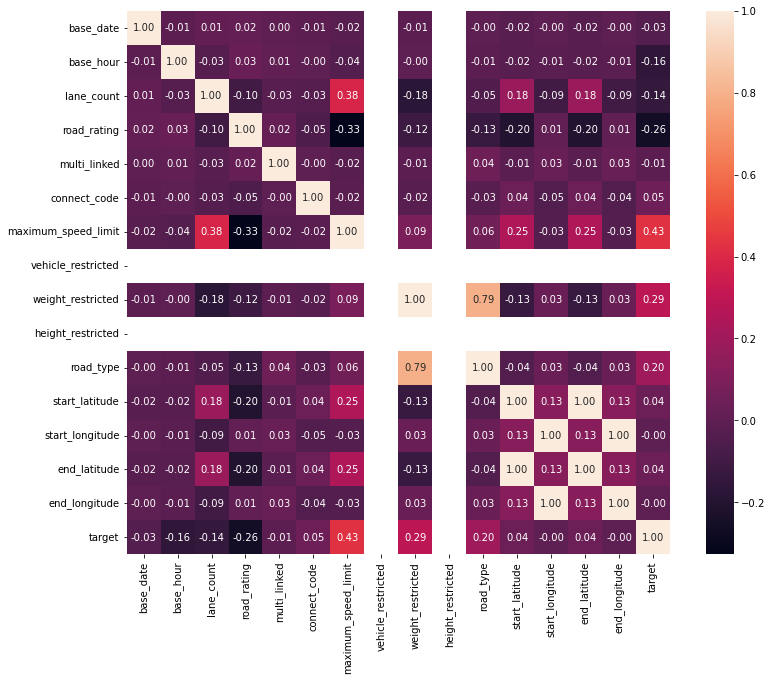

In [34]:
train_corr = train.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(train_corr, annot=True, fmt = '.2f', square=True)

<AxesSubplot:>

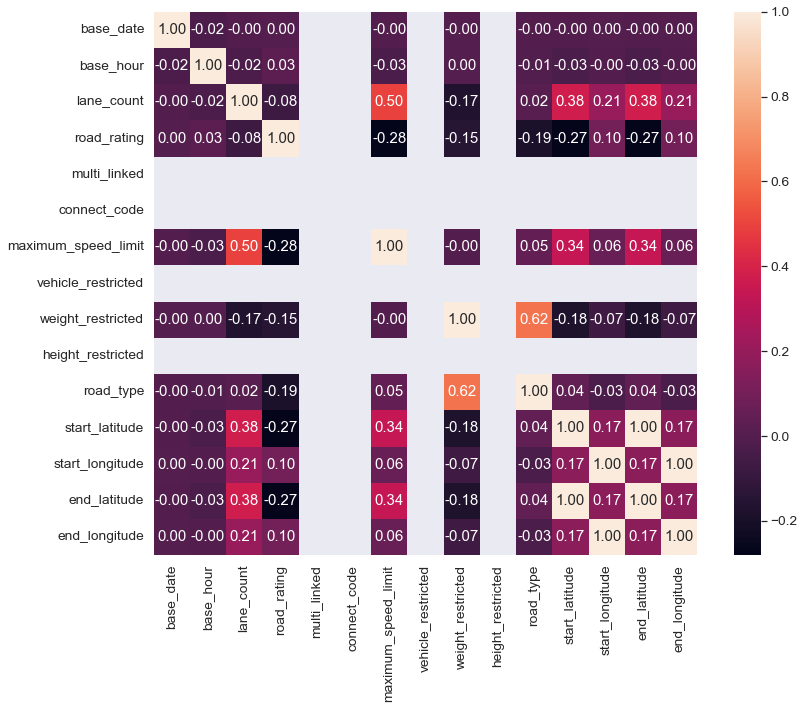

In [50]:
test_corr = test.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(test_corr, annot=True, fmt = '.2f', square=True)

In [10]:
train_core = train[['maximum_speed_limit', 'road_rating', 'weight_restricted', 'road_type']]

#### 40에 해당하는 값 삭제

In [16]:
train['maximum_speed_limit'].value_counts()

60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: maximum_speed_limit, dtype: int64

<AxesSubplot:xlabel='maximum_speed_limit', ylabel='target'>

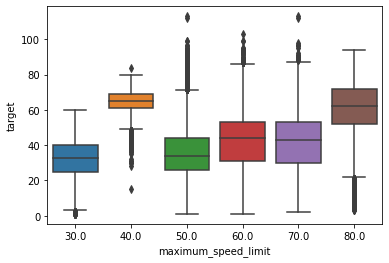

In [21]:
sns.boxplot(x = "maximum_speed_limit", y = "target", data = train)

In [17]:
train['road_rating'].value_counts()

103    2159511
107    1582214
106     959492
Name: road_rating, dtype: int64

<AxesSubplot:xlabel='road_rating', ylabel='target'>

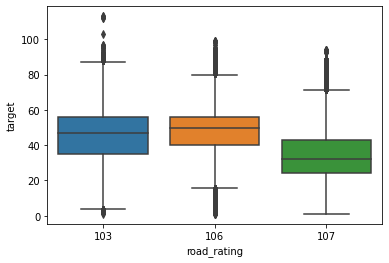

In [23]:
sns.boxplot(x='road_rating', y="target", data=train)

#### 50000에 해당하는 값 삭제

In [18]:
train['weight_restricted'].value_counts()

0.0        4032874
43200.0     410361
32400.0     239305
50000.0      18677
Name: weight_restricted, dtype: int64

<AxesSubplot:xlabel='weight_restricted', ylabel='target'>

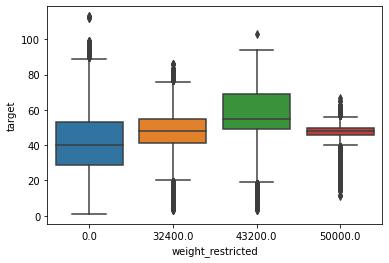

In [22]:
sns.boxplot(x='weight_restricted', y="target", data=train)

In [19]:
train['road_type'].value_counts()

0    3737117
3     964100
Name: road_type, dtype: int64

<AxesSubplot:xlabel='road_type', ylabel='target'>

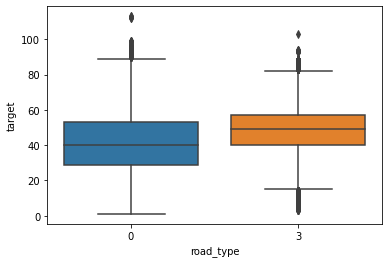

In [24]:
sns.boxplot(x='road_type', y="target", data=train)

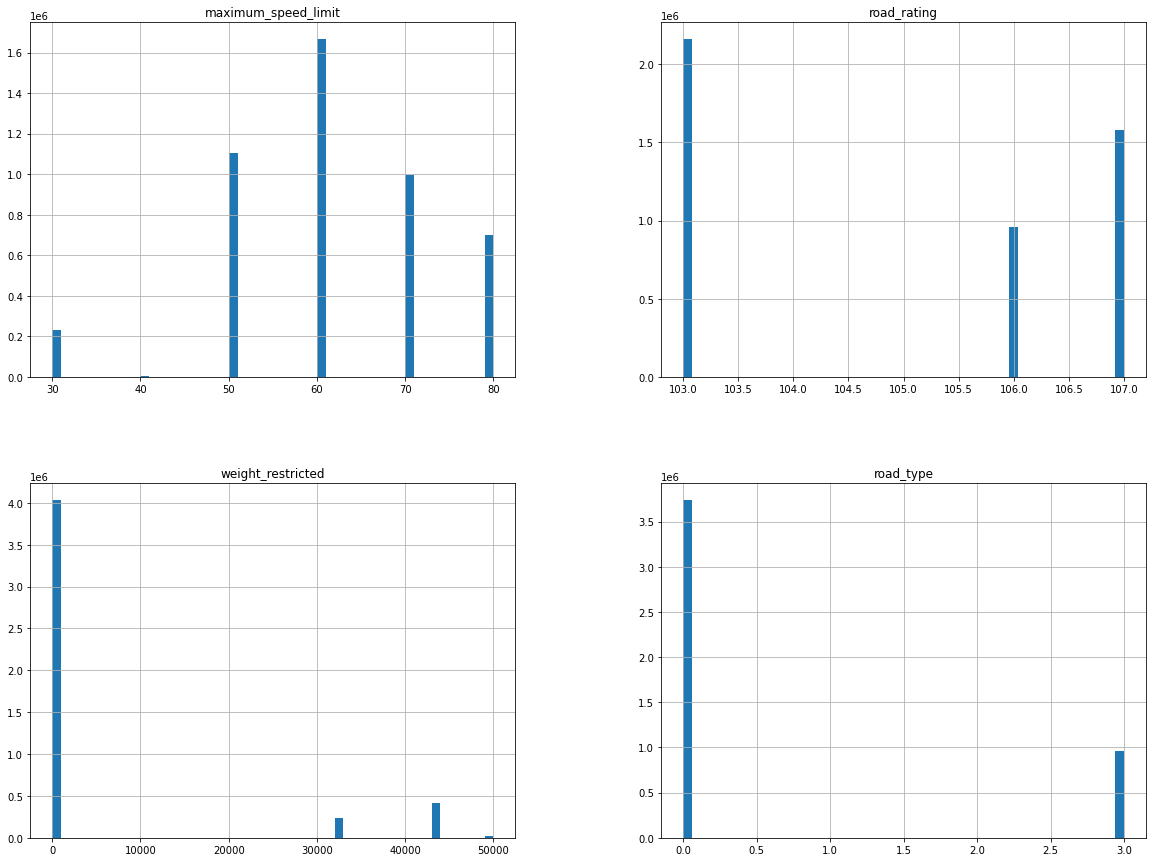

In [11]:
h = train_core.hist(bins=50, figsize=(20, 15))

<AxesSubplot:xlabel='road_type', ylabel='target'>

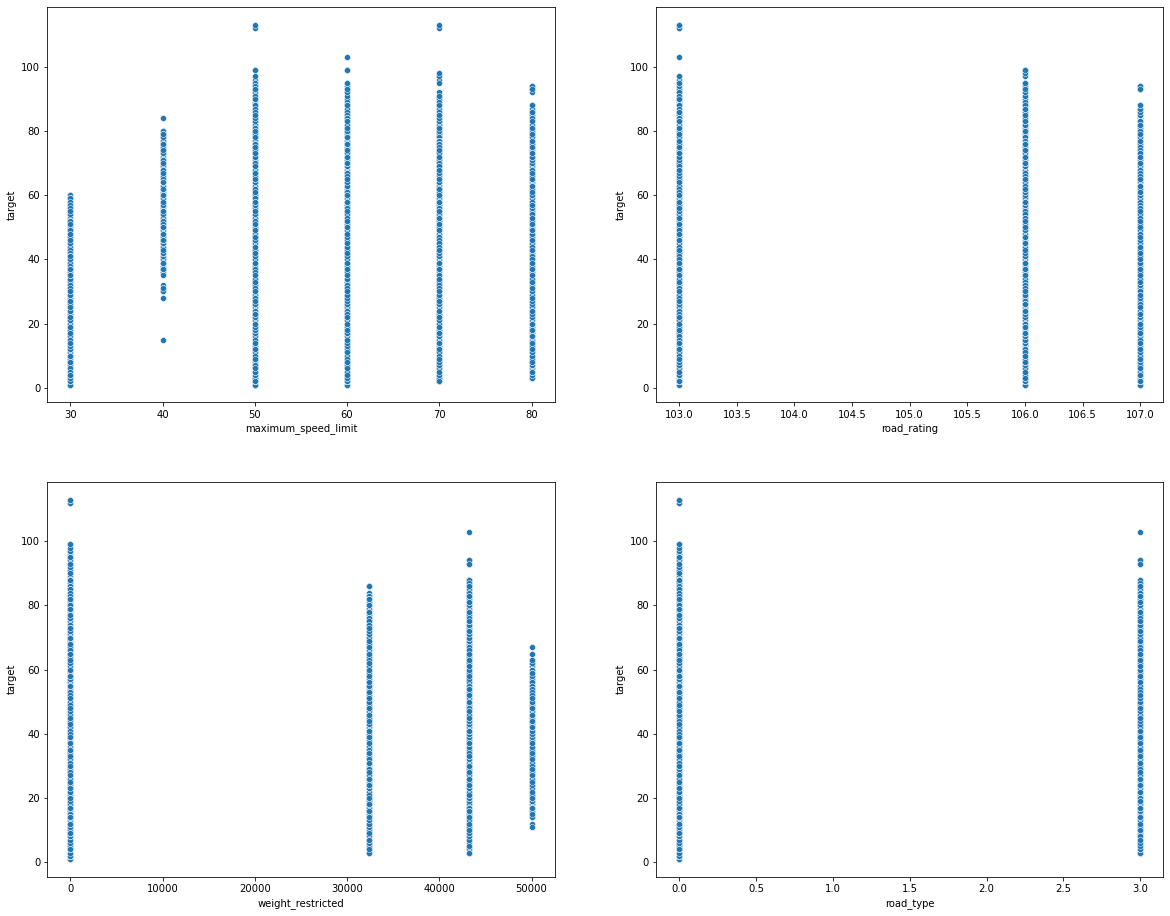

In [13]:
figure, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 16))

sns.scatterplot(data = train, x = 'maximum_speed_limit', y = 'target', ax = axes[0][0])
sns.scatterplot(data = train, x = 'road_rating', y = 'target', ax = axes[0][1])
sns.scatterplot(data = train, x = 'weight_restricted', y = 'target', ax = axes[1][0])
sns.scatterplot(data = train, x = 'road_type', y = 'target', ax = axes[1][1])

<AxesSubplot:xlabel='road_type', ylabel='Density'>

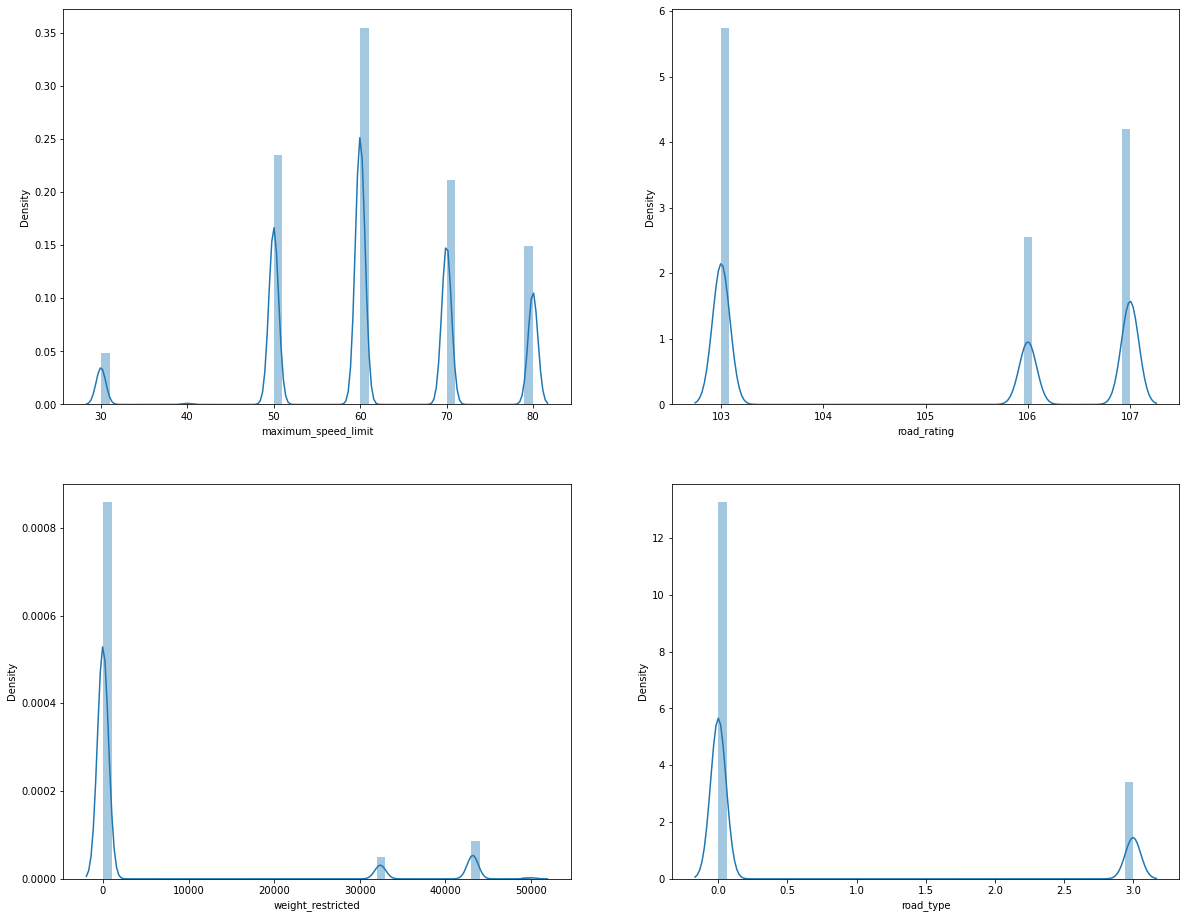

In [15]:
figure, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 16))

sns.distplot(train['maximum_speed_limit'], ax = axes[0][0])
sns.distplot(train['road_rating'], ax = axes[0][1])
sns.distplot(train['weight_restricted'], ax = axes[1][0])
sns.distplot(train['road_type'], ax = axes[1][1])

In [5]:
all_data = pd.concat([train,test], axis=0, ignore_index=True)
all_data

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992453,TEST_291236,20220827,토,5,1,103,일반국도16호선,0,0,80.0,...,0,월산마을,33.472819,126.463030,없음,도근교,33.470483,126.460846,없음,NaN
4992454,TEST_291237,20220819,금,20,2,103,일반국도11호선,0,0,60.0,...,0,영주교,33.305359,126.598914,없음,하례입구삼거리,33.300796,126.600332,없음,NaN
4992455,TEST_291238,20220805,금,11,1,107,신대로,0,0,30.0,...,0,마리나사거리,33.493624,126.496769,있음,칠오광장사거리,33.497500,126.496946,있음,NaN
4992456,TEST_291239,20220812,금,7,2,107,경찰로,0,0,60.0,...,0,국민의료보험관리공단,33.254782,126.507014,없음,의료보험조합,33.255659,126.507333,없음,NaN


In [6]:
all_data = all_data.drop_duplicates()

In [7]:
all_data=all_data.drop('height_restricted',axis=1)
all_data=all_data.drop('vehicle_restricted',axis=1)
all_data=all_data.drop('multi_linked',axis=1)

In [8]:
all_data["base_date"] = pd.to_datetime(all_data["base_date"],format='%Y%m%d')
all_data['year']= all_data['base_date'].dt.year
all_data['month']= all_data['base_date'].dt.month
all_data['day']= all_data['base_date'].dt.day

In [9]:
all_data

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,connect_code,maximum_speed_limit,weight_restricted,...,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,60.0,32400.0,...,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,2022,6,23
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,60.0,0.0,...,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022,7,28
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,80.0,0.0,...,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,2021,10,10
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,50.0,0.0,...,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,2022,3,11
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,80.0,0.0,...,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,2021,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992453,TEST_291236,2022-08-27,토,5,1,103,일반국도16호선,0,80.0,0.0,...,126.463030,없음,도근교,33.470483,126.460846,없음,NaN,2022,8,27
4992454,TEST_291237,2022-08-19,금,20,2,103,일반국도11호선,0,60.0,0.0,...,126.598914,없음,하례입구삼거리,33.300796,126.600332,없음,NaN,2022,8,19
4992455,TEST_291238,2022-08-05,금,11,1,107,신대로,0,30.0,0.0,...,126.496769,있음,칠오광장사거리,33.497500,126.496946,있음,NaN,2022,8,5
4992456,TEST_291239,2022-08-12,금,7,2,107,경찰로,0,60.0,0.0,...,126.507014,없음,의료보험조합,33.255659,126.507333,없음,NaN,2022,8,12


<AxesSubplot:xlabel='month', ylabel='count'>

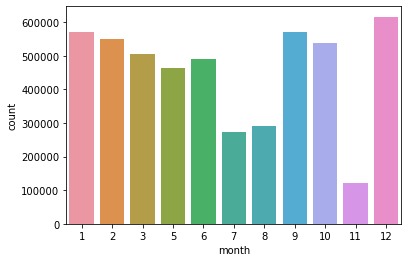

In [11]:
sns.countplot(data=all_data, x='month')

<AxesSubplot:xlabel='year', ylabel='count'>

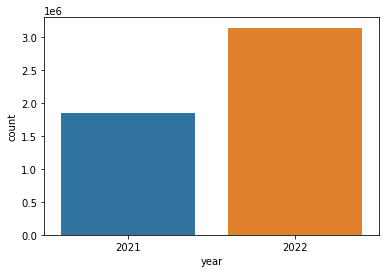

In [12]:
sns.countplot(data=all_data, x='year')

<AxesSubplot:xlabel='base_date', ylabel='count'>

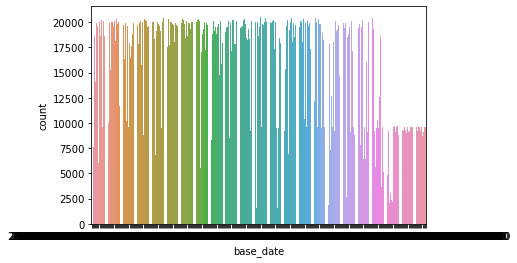

In [13]:
sns.countplot(data=all_data, x='base_date')